# #Task-8
## Name: Aftab Ahmed
## Registration ID: SIRSS2310

### Heart Attack Analysis & Prediction
#### Q. Analysis & Predict Heart Attack based on Age, Gender, No. of disease they have and some other aspects
Description: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/tasks?taskId=3833

### Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.tail(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Describing the dataset

In [4]:
df.shape

(303, 14)

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age of the Patients')

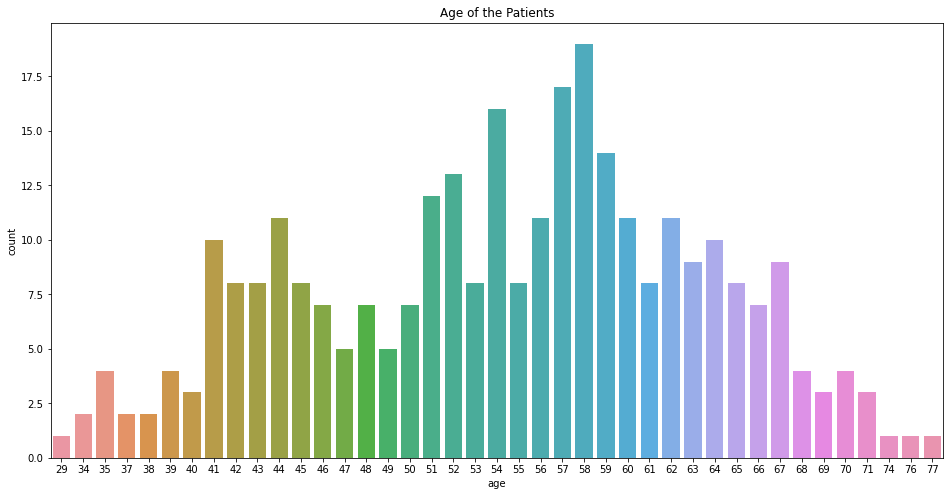

In [12]:
plt.figure(figsize = (16,8))
sns.countplot(df['age'])
plt.title('Age of the Patients')

Text(0.5, 1.0, 'Distribution of gender with respect to heart attack')

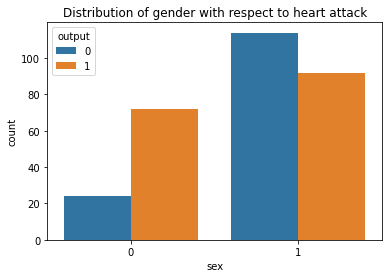

In [13]:
plt.figure()
sns.countplot(x = 'sex', hue = 'output', data = df)
plt.title('Distribution of gender with respect to heart attack')

Text(0.5, 1.0, 'Distribution of chest pain with respect to heart attack')

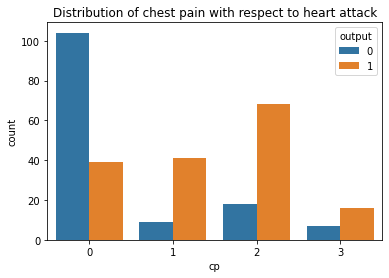

In [14]:
plt.figure()
sns.countplot(x = 'cp', hue = 'output', data = df)
plt.title('Distribution of chest pain with respect to heart attack')

Text(0.5, 1.0, 'Distribution of cholestrol with respect to heart attack')

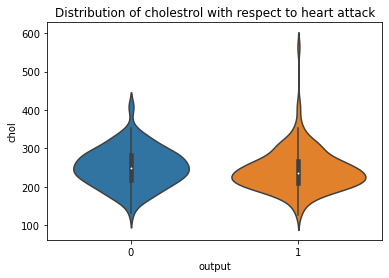

In [15]:
plt.figure()
sns.violinplot(x = 'output', y = 'chol', data = df)
plt.title('Distribution of cholestrol with respect to heart attack')

Text(0.5, 1.0, 'Distribution of fasting blood sugar with respect to heart attack')

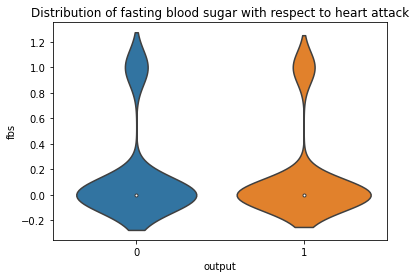

In [16]:
plt.figure()
sns.violinplot(x = 'output', y = 'fbs', data = df)
plt.title('Distribution of fasting blood sugar with respect to heart attack')

Text(0.5, 1.0, 'Distribution of resting electrocardiographic results with respect to heart attack')

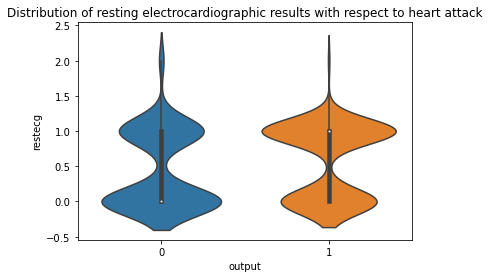

In [17]:
plt.figure()
sns.violinplot(x = 'output', y = 'restecg', data = df)
plt.title('Distribution of resting electrocardiographic results with respect to heart attack')

Text(0.5, 1.0, 'Distribution of maximum heart rate achieved with respect to heart attack')

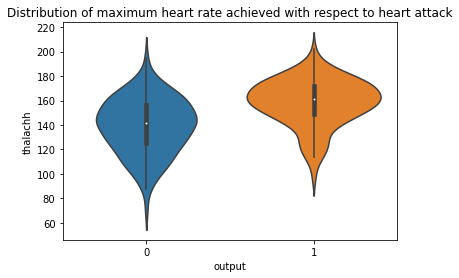

In [18]:
plt.figure()
sns.violinplot(x = 'output', y = 'thalachh', data = df)
plt.title('Distribution of maximum heart rate achieved with respect to heart attack')

Text(0.5, 1.0, 'Distribution of chest pain with respect to resting blood pressure')

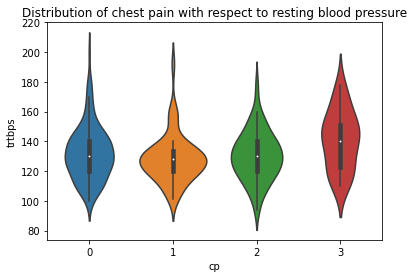

In [19]:
plt.figure()
sns.violinplot(x = 'cp', y = 'trtbps', data = df)
plt.title('Distribution of chest pain with respect to resting blood pressure')

Text(0.5, 1.0, 'Distribution of number of major vessels with respect to heart attack')

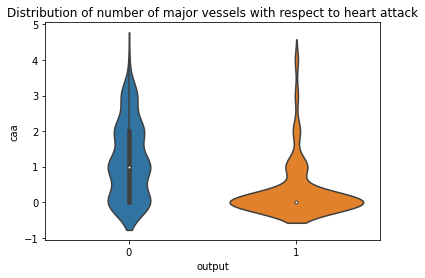

In [20]:
plt.figure()
sns.violinplot(x = 'output', y = 'caa', data = df)
plt.title('Distribution of number of major vessels with respect to heart attack')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

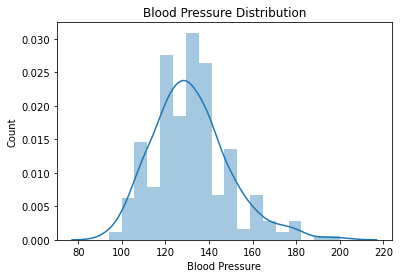

In [21]:
plt.figure()
sns.distplot(df['trtbps'])
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

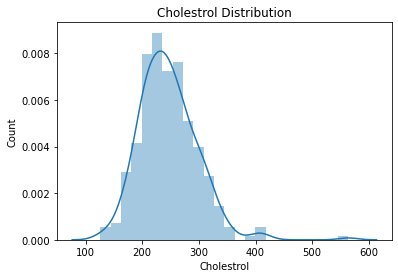

In [22]:
plt.figure()
sns.distplot(df['chol'])
plt.title('Cholestrol Distribution')
plt.xlabel('Cholestrol')
plt.ylabel('Count')

Text(0, 0.5, 'Blood Pressure')

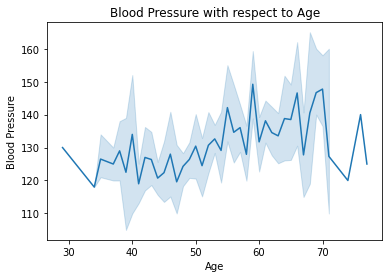

In [23]:
plt.figure()
sns.lineplot(x = 'age', y = 'trtbps',data = df)
plt.title('Blood Pressure with respect to Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')

Text(0, 0.5, 'Cholestrol')

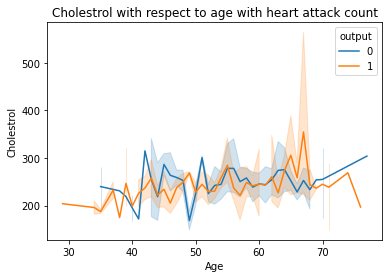

In [24]:
plt.figure()
sns.lineplot(x = 'age', y = 'chol', hue = 'output', data = df)
plt.title('Cholestrol with respect to age with heart attack count')
plt.xlabel('Age')
plt.ylabel('Cholestrol')

Text(0, 0.5, 'Maximum heart rate achieved')

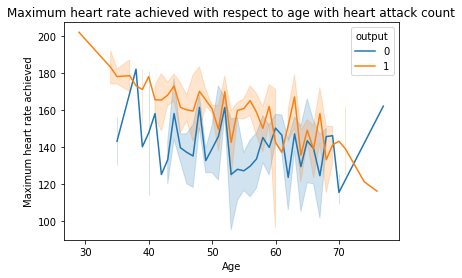

In [25]:
plt.figure()
sns.lineplot(x = 'age', y = 'thalachh', hue = 'output', data = df)
plt.title('Maximum heart rate achieved with respect to age with heart attack count')
plt.xlabel('Age')
plt.ylabel('Maximum heart rate achieved')

<AxesSubplot:>

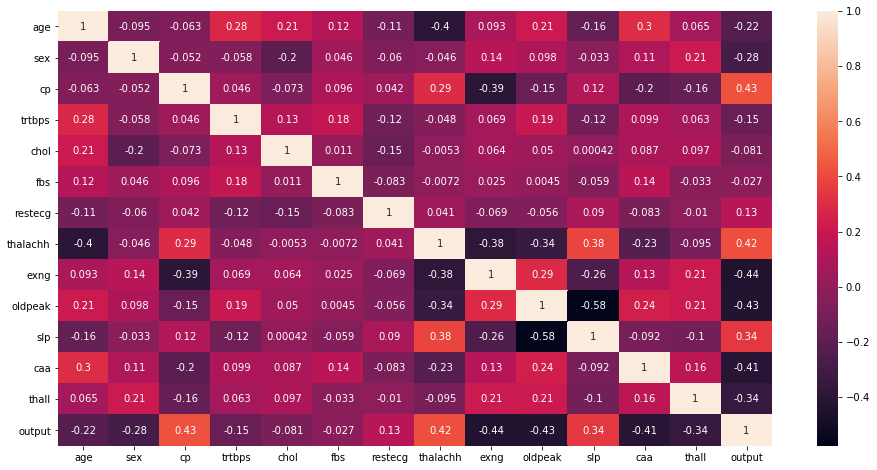

In [26]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot = True)

### Training the model

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['output'],axis =1).values
Y = df['output'].values
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size = 0.20)

In [28]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (241, 13)
Shape of x_test:  (61, 13)
Shape of y_train:  (241,)
Shape of y_test:  (61,)


In [29]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred1 = model1.predict(x_test)
y_pred1

array([ 0.85390355,  0.53553427, -0.09362994,  0.39018496,  0.88651778,
        0.02317418,  1.13810671,  0.58171899,  0.79694013,  0.53326889,
        0.32065302,  0.61773263,  0.16609477,  0.76867045,  0.25810866,
       -0.12406387,  0.76281376,  0.62347971, -0.01813138, -0.12959431,
        0.71210053,  0.4861146 ,  0.88844788,  0.63403   ,  0.63743853,
       -0.38067452,  0.98574868,  1.02938624,  1.17118772,  0.20786309,
        0.42553268,  0.04850496,  1.00166284,  0.05156522,  0.05266135,
        0.1426855 ,  0.26125442,  0.11661857,  0.35147161,  1.12473061,
       -0.0573198 ,  0.7263537 ,  0.74711594,  0.59518824,  0.92897342,
       -0.15829012,  1.1326055 ,  0.35199974,  0.70692752, -0.10423186,
        0.16258932,  0.9364616 ,  0.27282152,  0.95391681,  1.02702586,
        0.88281098,  0.90157612,  0.86920063,  0.47081706, -0.00809437,
        0.65080363])

In [31]:
model1.intercept_

0.9891436963776996

In [32]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score
y_pred2 = model2.predict(x_test)
accuracy_score(y_test,y_pred2)

0.8688524590163934

In [34]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train, y_train)

SVC()

In [35]:
y_pred3 = model2.predict(x_test)
accuracy_score(y_test,y_pred3)

0.8688524590163934